In [ ]:
from datetime import date, timedelta

import ipyvolume as ipv
import matplotlib as mplt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [ ]:
# Import du dataset

%cd "Chemin vers le Dataset"

df_olist_customers = pd.read_csv("olist_customers_dataset.csv", sep=",")
df_olist_geolocalisation = pd.read_csv("olist_geolocation_dataset.csv",
                                       sep=",")
df_olist_order_items = pd.read_csv("olist_order_items_dataset.csv", sep=",")
df_olist_order_payments = pd.read_csv("olist_order_payments_dataset.csv",
                                      sep=",")
df_olist_order_reviews_dataset = pd.read_csv(
    "olist_order_reviews_dataset.csv", sep=",")
df_olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv", sep=",")
df_olist_products = pd.read_csv("olist_products_dataset.csv", sep=",")
df_olist_sellers = pd.read_csv("olist_sellers_dataset.csv", sep=",")
df_olist_products_category_name_translation = pd.read_csv(
    "product_category_name_translation.csv", sep=","
)

C:\Users\33769\OneDrive\Bureau\DataScientist\Projets\Projet_5


In [ ]:
pd.set_option("display.max_columns", 40)

In [ ]:
df_olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
df_olist_geolocalisation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [ ]:
df_olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
df_olist_order_items["shipping_limit_date"] = pd.to_datetime(
    df_olist_order_items["shipping_limit_date"]
)
df_olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [ ]:
df_olist_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [ ]:
df_olist_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [ ]:
df_olist_order_reviews_dataset["review_creation_date"] = pd.to_datetime(
    df_olist_order_reviews_dataset["review_creation_date"]
)
df_olist_order_reviews_dataset["review_answer_timestamp"] = pd.to_datetime(
    df_olist_order_reviews_dataset["review_answer_timestamp"]
)
df_olist_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [ ]:
df_olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
df_olist_orders_dataset["order_purchase_timestamp"] = pd.to_datetime(
    df_olist_orders_dataset["order_purchase_timestamp"]
)
df_olist_orders_dataset["order_approved_at"] = pd.to_datetime(
    df_olist_orders_dataset["order_approved_at"]
)
df_olist_orders_dataset["order_delivered_carrier_date"] = pd.to_datetime(
    df_olist_orders_dataset["order_delivered_carrier_date"]
)
df_olist_orders_dataset["order_delivered_customer_date"] = pd.to_datetime(
    df_olist_orders_dataset["order_delivered_customer_date"]
)
df_olist_orders_dataset["order_estimated_delivery_date"] = pd.to_datetime(
    df_olist_orders_dataset["order_estimated_delivery_date"]
)
df_olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
df_olist_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [ ]:
df_olist_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
df_olist_products_category_name_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## Traduction des noms de catégories

In [ ]:
df_olist_products = pd.merge(
    df_olist_products,
    df_olist_products_category_name_translation,
    on="product_category_name",
    indicator=True,
)

In [ ]:
df_olist_products["_merge"].value_counts()

both          32328
left_only         0
right_only        0
Name: _merge, dtype: int64

In [ ]:
del df_olist_products["product_category_name"]
del df_olist_products["_merge"]

## Jonction des différents datasets

![shema_olist_bdd.png](attachment:4be0540c-9ca6-43a8-9da9-2bf96e92dd2e.png)

### Commandes-items-produits

In [ ]:
df_olist_order_items_products = pd.merge(
    df_olist_order_items, df_olist_products, on="product_id", indicator=True
)

In [ ]:
df_olist_order_items_products["_merge"].value_counts()

both          111023
left_only          0
right_only         0
Name: _merge, dtype: int64

In [ ]:
del df_olist_order_items_products["_merge"]

### Commandes-clients

In [ ]:
df_olist_orders_customer = pd.merge(
    df_olist_orders_dataset, df_olist_customers,
    on="customer_id", indicator=True)

In [ ]:
df_olist_orders_customer["_merge"].value_counts()

both          99441
left_only         0
right_only        0
Name: _merge, dtype: int64

In [ ]:
del df_olist_orders_customer["_merge"]

### Commandes avis

In [ ]:
df_olist_orders_reviews_customers = pd.merge(
    df_olist_orders_customer,
    df_olist_order_reviews_dataset,
    on="order_id",
    indicator=True,
)

In [ ]:
df_olist_orders_reviews_customers["_merge"].value_counts()

both          99224
left_only         0
right_only        0
Name: _merge, dtype: int64

In [ ]:
del df_olist_orders_reviews_customers["_merge"]

### Commande-paiment

In [ ]:
df_olist_orders_reviews_customers_payments = pd.merge(
    df_olist_orders_reviews_customers,
    df_olist_order_payments,
    on="order_id",
    indicator=True,
)

In [ ]:
df_olist_orders_reviews_customers_payments["_merge"].value_counts()

both          103677
left_only          0
right_only         0
Name: _merge, dtype: int64

In [ ]:
del df_olist_orders_reviews_customers_payments["_merge"]

### Commande-Produits

In [ ]:
df_olist_complet = pd.merge(
    df_olist_orders_reviews_customers_payments,
    df_olist_order_items_products,
    on="order_id",
    indicator=True,
)

In [ ]:
df_olist_complet["_merge"].value_counts()

both          115609
left_only          0
right_only         0
Name: _merge, dtype: int64

In [ ]:
del df_olist_complet["_merge"]

## Dataset complet

In [ ]:
df_olist_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115609 non-null  object        
 1   customer_id                    115609 non-null  object        
 2   order_status                   115609 non-null  object        
 3   order_purchase_timestamp       115609 non-null  datetime64[ns]
 4   order_approved_at              115595 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 6   order_delivered_customer_date  113209 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 8   customer_unique_id             115609 non-null  object        
 9   customer_zip_code_prefix       115609 non-null  int64         
 10  customer_city                  115609 non-null  object        
 11  

In [ ]:
del df_olist_complet["review_comment_title"]
del df_olist_complet["review_comment_message"]
del df_olist_complet["freight_value"]
del df_olist_complet["product_name_lenght"]
del df_olist_complet["product_description_lenght"]
del df_olist_complet["product_photos_qty"]
del df_olist_complet["product_length_cm"]
del df_olist_complet["product_weight_g"]
del df_olist_complet["product_height_cm"]
del df_olist_complet["product_width_cm"]
del df_olist_complet["payment_type"]
del df_olist_complet["payment_sequential"]

In [ ]:
df_olist_complet.describe()

,customer_zip_code_prefix,review_score,payment_installments,payment_value,order_item_id,price
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000
mean,35061.537597,4.034409,2.946233,172.387379,1.194535,120.619850
std,29841.671732,1.385584,2.781087,265.873969,0.685926,182.653476
min,1003.000000,1.000000,0.000000,0.000000,1.000000,0.850000
25%,11310.000000,4.000000,1.000000,60.870000,1.000000,39.900000
50%,24241.000000,5.000000,2.000000,108.050000,1.000000,74.900000
75%,58745.000000,5.000000,4.000000,189.480000,1.000000,134.900000
max,99980.000000,5.000000,24.000000,13664.080000,21.000000,6735.000000


In [ ]:
df_olist_complet.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_creation_date,review_answer_timestamp,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,1,18.12,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,1,2.00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11,2017-10-12 03:43:48,1,18.59,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,8d5266042046a06655c8db133d120ba5,4,2018-08-08,2018-08-08 18:37:50,1,141.46,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18,2018-08-22 19:07:58,3,179.12,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,auto
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03,2017-12-05 19:21:58,1,72.20,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,pet_shop
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,e50934924e227544ba8246aeb3770dd4,5,2018-02-17,2018-02-18 13:02:51,1,28.62,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,stationery
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,congonhinhas,PR,89b738e70a1ce346db29a20fb2910161,4,2017-07-27,2017-07-27 22:48:30,6,175.26,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.90,auto
8,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,nilopolis,RJ,07d67dd06ed5f88bef11ef6b464e79ae,5,2017-05-27,2017-05-28 02:59:57,3,75.16,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c

In [ ]:
df_olist_complet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115609 entries, 0 to 115608
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115609 non-null  object        
 1   customer_id                    115609 non-null  object        
 2   order_status                   115609 non-null  object        
 3   order_purchase_timestamp       115609 non-null  datetime64[ns]
 4   order_approved_at              115595 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114414 non-null  datetime64[ns]
 6   order_delivered_customer_date  113209 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115609 non-null  datetime64[ns]
 8   customer_unique_id             115609 non-null  object        
 9   customer_zip_code_prefix       115609 non-null  int64         
 10  customer_city                  115609 non-null  object        
 11  

### Exploration dartaset complet

#### variables temporelles

In [ ]:
df_olist_complet_initial = df_olist_complet.copy()

In [ ]:
df_olist_complet["order_purchase_timestamp"].min()

Timestamp('2016-09-04 21:15:19')

In [ ]:
df_olist_complet["order_purchase_timestamp"].max()

Timestamp('2018-09-03 09:06:57')

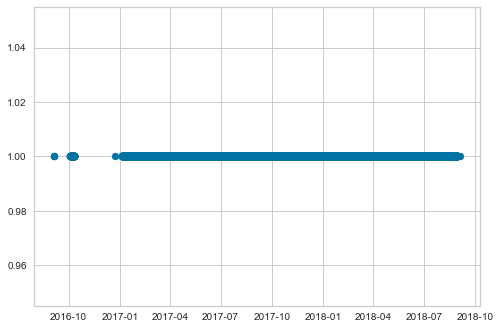

In [ ]:
plt.scatter(
    df_olist_complet["order_purchase_timestamp"],
    y=np.linspace(1, 1, len(df_olist_complet["order_purchase_timestamp"])),
)

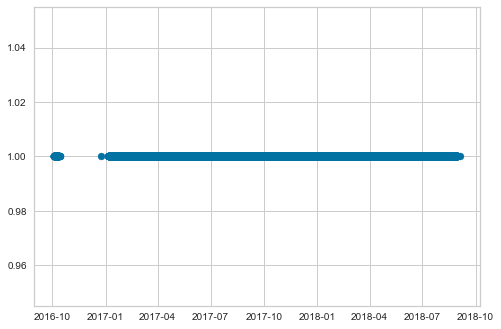

In [ ]:
plt.scatter(
    df_olist_complet["order_approved_at"],
    y=np.linspace(1, 1, len(df_olist_complet["order_approved_at"])),
)

Il y a un arret entre fin 2016 et  debut 2017, surement dû à un arret temporaire de l'entreprise, pour supprimer ce gap et eviter un clustering sur ce gap nous augmenterons toutes les variables temporelles liées à des commandes des valeurs d'avant le gap de la durée de ce gap

In [ ]:
pd.set_option("display.max_rows", 500)
df_gap = df_olist_complet[df_olist_complet["order_purchase_timestamp"] < "2017/01/15"]
df_gap["order_purchase_timestamp"].sort_values(ascending=True)

5217     2016-09-04 21:15:19
5216     2016-09-04 21:15:19
5058     2016-09-05 00:15:34
96475    2016-10-02 22:07:52
108435   2016-10-03 09:44:50
33138    2016-10-03 16:56:50
107668   2016-10-03 21:01:41
113847   2016-10-03 21:13:36
102752   2016-10-03 22:06:03
7793     2016-10-03 22:31:31
72079    2016-10-03 22:44:10
39066    2016-10-03 22:51:30
74316    2016-10-04 09:16:33
77850    2016-10-04 09:59:03
41800    2016-10-04 10:16:04
86170    2016-10-04 10:41:17
9799     2016-10-04 11:03:14
37394    2016-10-04 12:06:11
18962    2016-10-04 12:53:17
91504    2016-10-04 13:02:10
68592    2016-10-04 13:11:29
68593    2016-10-04 13:11:29
28811    2016-10-04 13:15:46
98426    2016-10-04 13:15:52
97839    2016-10-04 13:16:57
113344   2016-10-04 13:22:56
113345   2016-10-04 13:22:56
113346   2016-10-04 13:22:56
113343   2016-10-04 13:22:56
113342   2016-10-04 13:22:56
113341   2016-10-04 13:22:56
113340   2016-10-04 13:22:56
66153    2016-10-04 13:30:13
28178    2016-10-04 13:38:37
96176    2016-

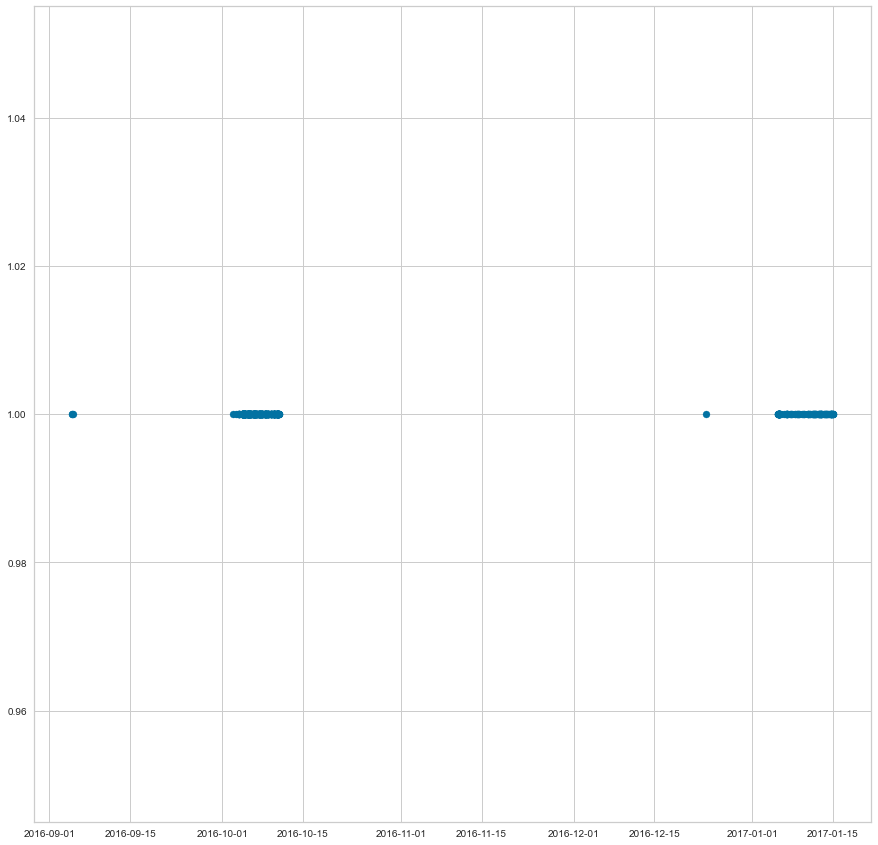

In [ ]:
plt.figure(figsize=(15, 15))
plt.scatter(
    df_gap["order_purchase_timestamp"],
    y=np.linspace(1, 1, len(df_gap["order_purchase_timestamp"])),
)

##### Suppression des gaps temporels dûs au démarrage du site

In [ ]:
date(2016, 10, 2) - date(2016, 9, 5)

datetime.timedelta(days=27)

In [ ]:
date(2016, 12, 23) - date(2016, 10, 2)

datetime.timedelta(days=82)

In [ ]:
date(2017, 1, 5) - date(2016, 12, 23)

datetime.timedelta(days=13)

In [ ]:
# Liste des variables temporelles à décaler
# (les écarts de temps entre celles ci
# étant les caracteristiques nous interessant
# ce décalage n'aura pas d'influence sur la qualité de notre analyse RFM :

# 1er gap

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "order_approved_at"
] = df_olist_complet["order_approved_at"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6",
    "order_delivered_carrier_date",
] = df_olist_complet["order_delivered_carrier_date"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6",
    "order_delivered_customer_date",
] = df_olist_complet["order_delivered_customer_date"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6",
    "order_estimated_delivery_date",
] = df_olist_complet["order_estimated_delivery_date"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6",
    "review_creation_date"
] = df_olist_complet["review_creation_date"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6",
    "review_answer_timestamp"
] = df_olist_complet["review_answer_timestamp"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6",
    "shipping_limit_date"
] = df_olist_complet["shipping_limit_date"] + timedelta(days=27)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/9/6",
    "order_purchase_timestamp",
] = df_olist_complet["order_purchase_timestamp"] + timedelta(days=27)


# 2d gap

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "order_approved_at"
] = df_olist_complet["order_approved_at"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "order_delivered_carrier_date",
] = df_olist_complet["order_delivered_carrier_date"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "order_delivered_customer_date",
] = df_olist_complet["order_delivered_customer_date"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "order_estimated_delivery_date",
] = df_olist_complet["order_estimated_delivery_date"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "review_creation_date"
] = df_olist_complet["review_creation_date"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "review_answer_timestamp",
] = df_olist_complet["review_answer_timestamp"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "shipping_limit_date"
] = df_olist_complet["shipping_limit_date"] + timedelta(days=82)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2016/12/23",
    "order_purchase_timestamp",
] = df_olist_complet["order_purchase_timestamp"] + timedelta(days=82)


# 3eme gap

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5",
    "order_approved_at"
] = df_olist_complet["order_approved_at"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5",
    "order_delivered_carrier_date",
] = df_olist_complet["order_delivered_carrier_date"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5",
    "order_delivered_customer_date",
] = df_olist_complet["order_delivered_customer_date"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5",
    "order_estimated_delivery_date",
] = df_olist_complet["order_estimated_delivery_date"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5",
    "review_creation_date"
] = df_olist_complet["review_creation_date"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5",
    "review_answer_timestamp"
] = df_olist_complet["review_answer_timestamp"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5",
    "shipping_limit_date"
] = df_olist_complet["shipping_limit_date"] + timedelta(days=13)

df_olist_complet.loc[
    df_olist_complet["order_purchase_timestamp"] < "2017/1/5",
    "order_purchase_timestamp",
] = df_olist_complet["order_purchase_timestamp"] + timedelta(days=13)

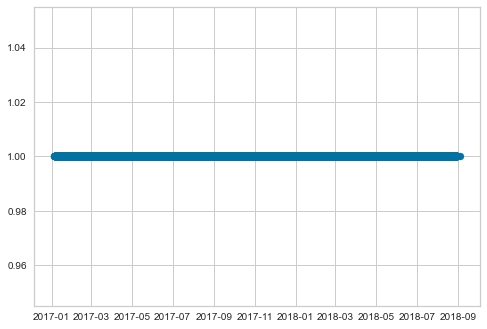

In [ ]:
plt.scatter(
    df_olist_complet["order_purchase_timestamp"],
    y=np.linspace(1, 1, len(df_olist_complet["order_purchase_timestamp"])),
)

#### Review score

In [ ]:
df_olist_complet["review_score"].value_counts()

5    65374
4    21951
1    14546
3     9718
2     4020
Name: review_score, dtype: int64

In [ ]:
bar_review = pd.DataFrame(df_olist_complet["review_score"]
                          .value_counts()).reset_index()
bar_review

,index,review_score
0,5,65374
1,4,21951
2,1,14546
3,3,9718
4,2,4020


In [ ]:
bar_review_percent = pd.DataFrame(df_olist_complet["review_score"]
                          .value_counts(normalize=True)).reset_index()
bar_review_percent

,index,review_score
0,5,0.565475
1,4,0.189873
2,1,0.125821
3,3,0.084059
4,2,0.034772


<AxesSubplot:title={'center':'Notes totales distribuées'}, xlabel='index'>

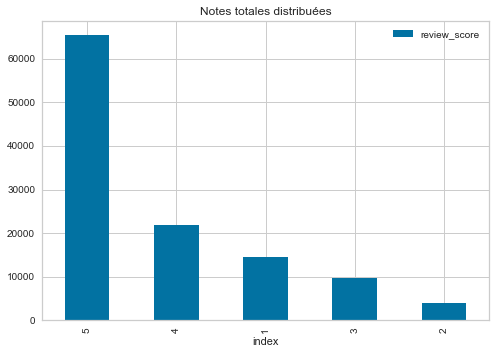

In [ ]:
bar_review.plot.bar(y="review_score", x="index",
                    title="Notes totales distribuées")

#### Variables geographiques

##### Etat

In [ ]:
bar_etat = pd.DataFrame(df_olist_complet["customer_state"]
                        .value_counts()).reset_index()
bar_etat

,index,customer_state
0,SP,48797
1,RJ,14987
2,MG,13429
3,RS,6413
4,PR,5879
5,SC,4218
6,BA,3942
7,DF,2449
8,GO,2359
9,ES,2300


<AxesSubplot:title={'center':'Nombre de commandes par etat'}, xlabel='index'>

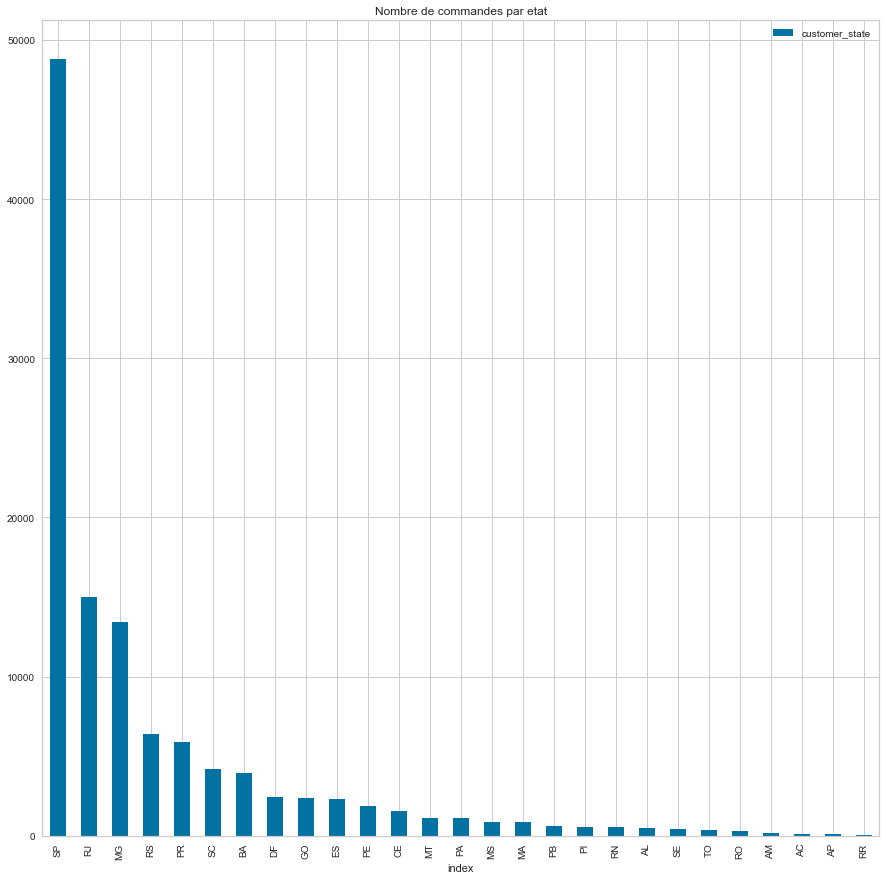

In [ ]:
bar_etat.plot.bar(
    y="customer_state",
    x="index",
    figsize=(15, 15),
    title="Nombre de commandes par etat",
)

#### Statuts de commandes

In [ ]:
bar_status = pd.DataFrame(df_olist_complet["order_status"]
                          .value_counts()).reset_index()
bar_status

,index,order_status
0,delivered,113210
1,shipped,1138
2,canceled,536
3,invoiced,358
4,processing,357
5,unavailable,7
6,approved,3


In [ ]:
bar_status = pd.DataFrame(df_olist_complet["order_status"]
                          .value_counts(normalize=True)).reset_index()
bar_status

,index,order_status
0,delivered,0.979249
1,shipped,0.009844
2,canceled,0.004636
3,invoiced,0.003097
4,processing,0.003088
5,unavailable,0.000061
6,approved,0.000026


<AxesSubplot:title={'center':'Nombre de statuts de commandes'}, xlabel='index'>

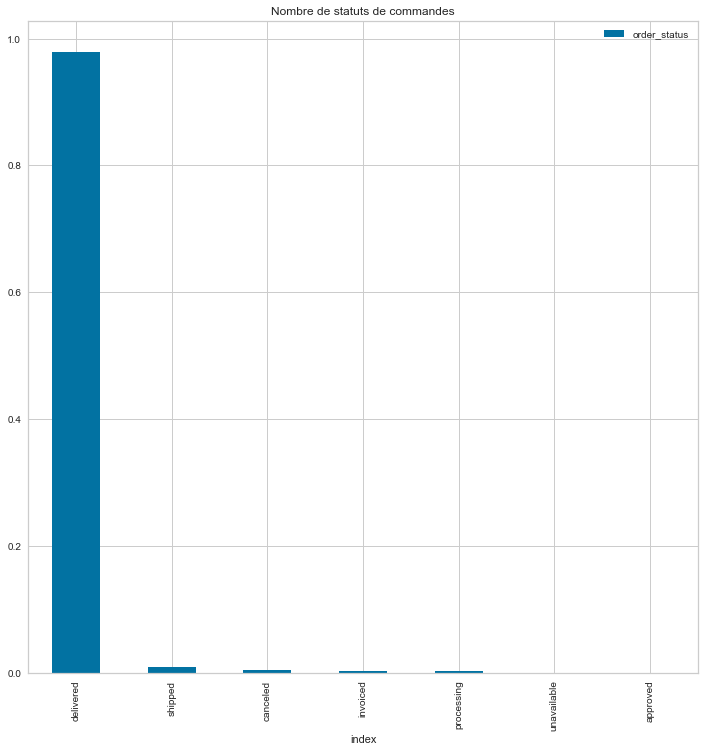

In [ ]:
bar_status.plot.bar(
    y="order_status",
    x="index",
    figsize=(12, 12),
    title="Nombre de statuts de commandes",
)

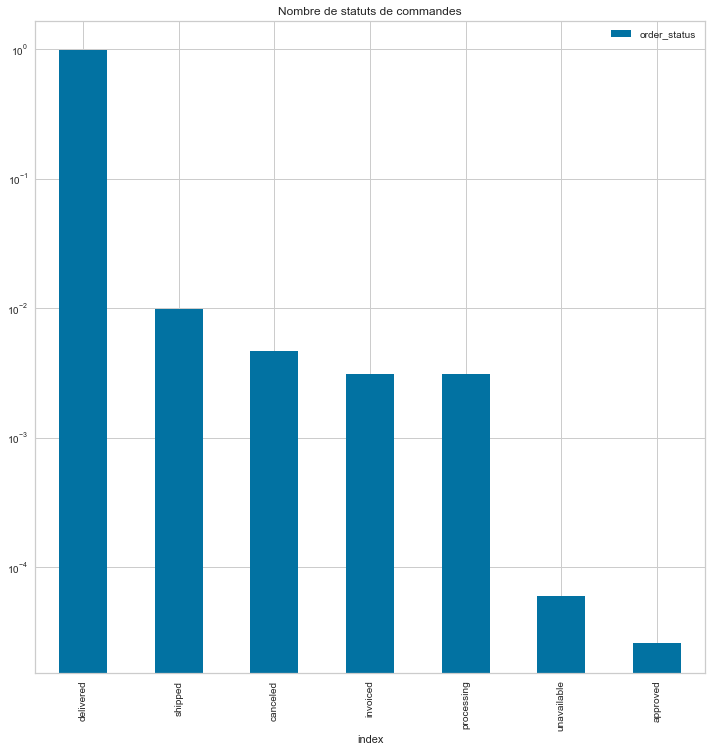

In [ ]:
bar_status.plot.bar(
    y="order_status",
    x="index",
    figsize=(12, 12),
    title="Nombre de statuts de commandes",
)
plt.yscale("log")

#### Product category

In [ ]:
bar_category = pd.DataFrame(df_olist_complet["product_category_name_english"]
                            .value_counts()).reset_index()
bar_category

,index,product_category_name_english
0,bed_bath_table,11847
1,health_beauty,9944
2,sports_leisure,8942
3,furniture_decor,8743
4,computers_accessories,8105
5,housewares,7331
6,watches_gifts,6161
7,telephony,4692
8,garden_tools,4558
9,auto,4356


<AxesSubplot:title={'center':'Nombre de statuts de commandes'}, xlabel='index'>

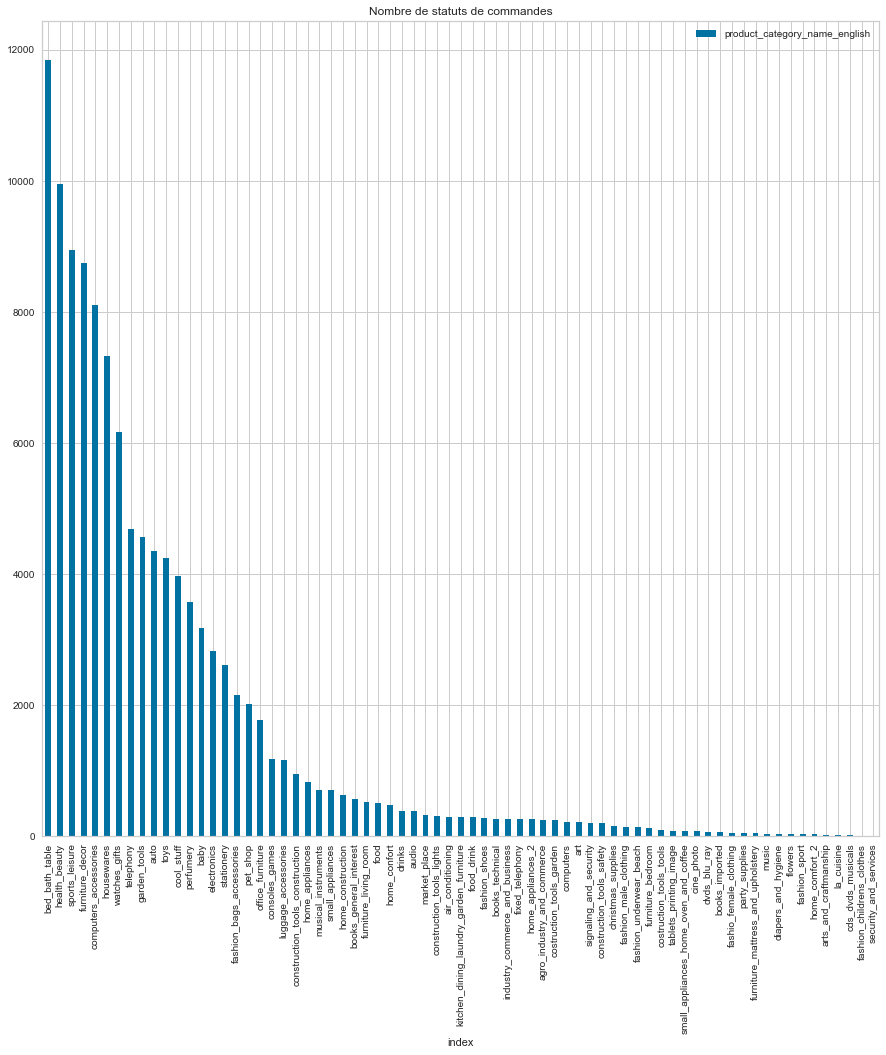

In [ ]:
bar_category.plot.bar(
    y="product_category_name_english",
    x="index",
    figsize=(15, 15),
    title="Nombre de statuts de commandes",
)

#### Valeur des paiments

In [ ]:
df_olist_complet["payment_value"].describe()

count    115609.000000
mean        172.387379
std         265.873969
min           0.000000
25%          60.870000
50%         108.050000
75%         189.480000
max       13664.080000
Name: payment_value, dtype: float64

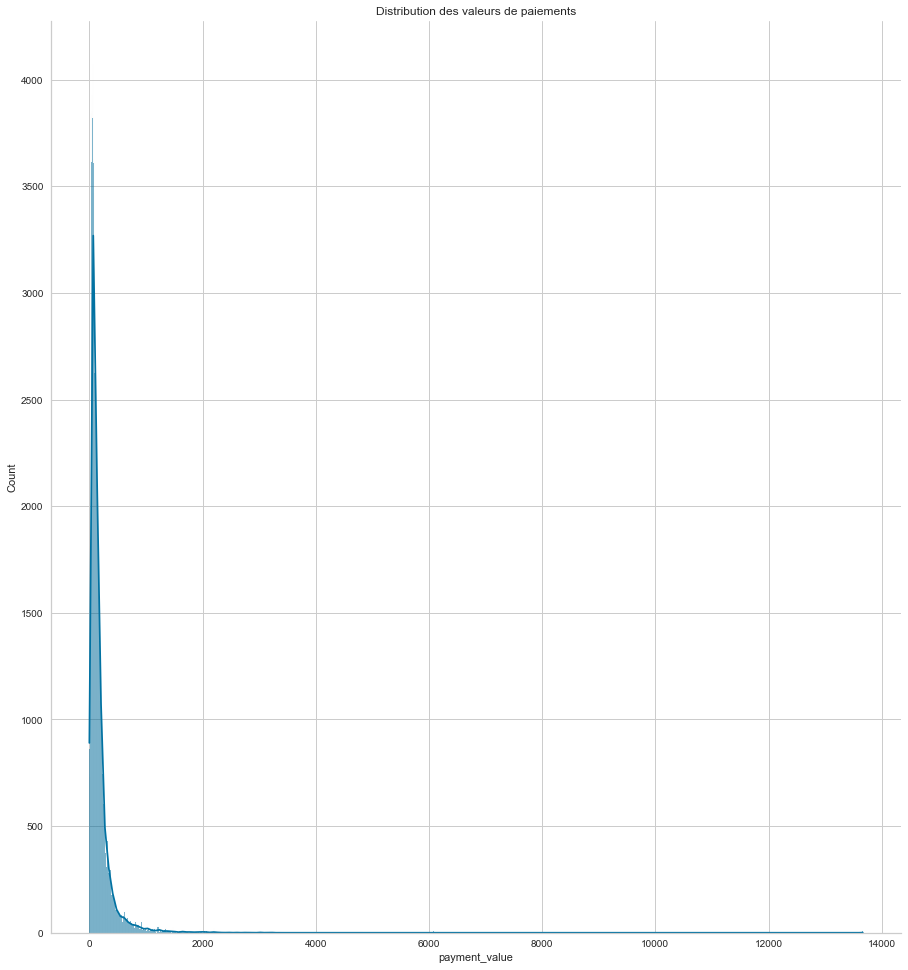

In [ ]:
ax = sns.displot(df_olist_complet["payment_value"], kde=True).set(
    title="Distribution des valeurs de paiements"
)
ax.fig.set_figwidth(15)
ax.fig.set_figheight(15)

#### Nombre de clients

In [ ]:
df_olist_complet["customer_unique_id"].nunique()

93396

#### Nombre de commandes

In [ ]:
df_olist_complet["order_id"].nunique()

96516

#### CA

##### Total

In [ ]:
df_olist_complet["payment_value"].sum()

19929532.499999996

In [ ]:
pd.DatetimeIndex(df_olist_complet[
    "order_purchase_timestamp"]).year.value_counts()

2018    62721
2017    52888
Name: order_purchase_timestamp, dtype: int64

##### 2016

In [ ]:
df_olist_complet_initial[pd.DatetimeIndex(
    df_olist_complet_initial["order_purchase_timestamp"]).year == 2016][
    "payment_value"].sum()

73142.95999999999

##### 2017

In [ ]:
df_olist_complet_initial[pd.DatetimeIndex(
    df_olist_complet_initial["order_purchase_timestamp"]).year == 2017][
    "payment_value"].sum()

8947145.91

##### 2018

In [ ]:
df_olist_complet_initial[pd.DatetimeIndex(
    df_olist_complet_initial["order_purchase_timestamp"]).year == 2018][
    "payment_value"].sum()

10909243.63